# 15.5. Visual Diagnostics

Suppose a data scientist has decided to use linear regression to estimate values of one variable (called the response variable) based on another variable (called the predictor). To see how well this method of estimation performs, the data scientist must measure how far off the estimates are from the actual values. These differences are called residuals.

residual = observed value - regression estimate

A residual is what’s left over – the residue – after estimation.





Residuals are the vertical distances of the points from the regression line. There is one residual for each point in the scatter plot. The residual is the difference between the observed value of *y* and the fitted value of *y*, so for the point (*x*, *y*),

residual = *y* - fitted value of *y* - height of regression line at *x*

The function `residual` calculates the residuals. The calculation assumes all the relevant functions we have are alread defined: `standard_un its`, `correlation`, `slope`, `intercept`, and `fit`.

In [5]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plots
%matplotlib inline

path_data = '../../data/'

In [1]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression 
    line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), 
               lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

In [8]:
def residual (table, x, y):
    return table.column(y) - fit(table, x, y)

In [7]:
original = Table.read_table(path_data + 'family_heights.csv')
heights = Table().with_columns(
    'MidParent', original.column('midparentHeight'),
    'Child', original.column('childHeight'))

Continuing our example of estimating the heights of adult children (the response) based on the midparent height (the predictor), let us calculate the fitted values and the residuals.

In [9]:
heights = heights.with_columns(
        'Fitted Value', fit(heights, 'MidParent', 'Child'),
        'Residual', residual(heights, 'MidParent', 'Child'))
heights

MidParent,Child,Fitted Value,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


In [10]:
##### correlate x and residual for fun
correlation(heights, 'MidParent', 'Residual')

-2.7196898076470642e-16

When there are so many variables to work with, it is always helpful to start with visualization. The function scatter_fit draws the scatter plot of the data, as well as the regression line.

In [11]:
def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), 
               lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

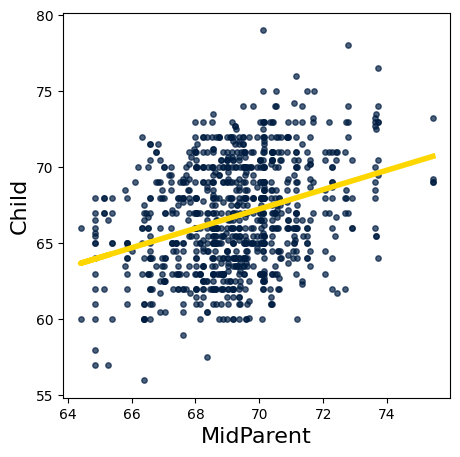

In [12]:
scatter_fit(heights, 'MidParent', 'Child')

A residual plot can be drawn by plotting the residuals against the predictor variable. The function residual_plot does just that.



In [13]:
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
        x, x_array, 'residuals', residual(table, x, y))
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

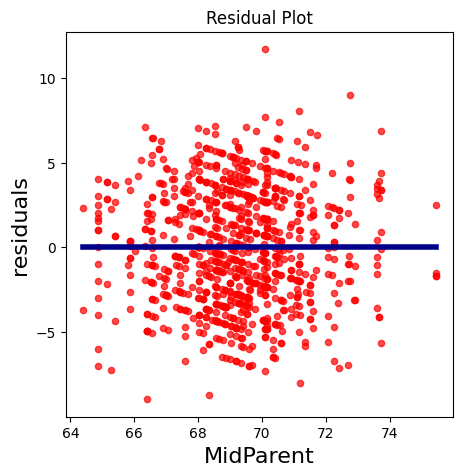

In [14]:
residual_plot(heights, 'MidParent', 'Child')

The midparent heights are on the horizontal axis, as in the original scatter plot. But now the vertical axis shows the residuals. Notice that the plot appears to be centered around the horizontal line at the level 0 (shown in dark blue). Notice also that the plot shows no upward or downward trend. We will observe later that this lack of trend is true of all regressions.



## 15.5.1. Regression Diagnostics

Residual plots help us make visual assessments of the quality of a linear regression analysis. Such assessments are called *diagnostics*. The function `regression_diagnostic_plots` draws the original scatter plot as well as the residual plot for ease of comparison.

In [15]:
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)

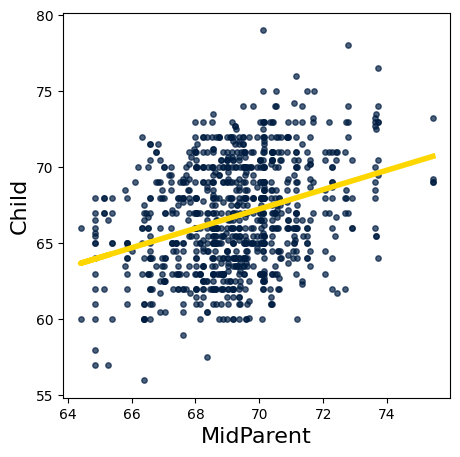

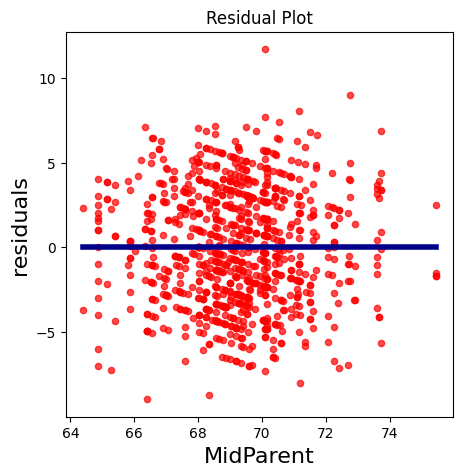

In [16]:
regression_diagnostic_plots(heights, 'MidParent', 'Child')

### 15.5.2. Detecting Nonlinearity


In [17]:
dugong = Table.read_table(path_data + 'dugongs.csv')
dugong = dugong.move_to_start('Length')
dugong

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [18]:
correlation(dugong, 'Length', 'Age')

0.82964745549057139

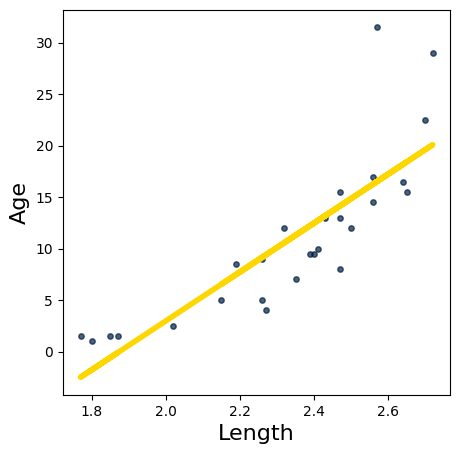

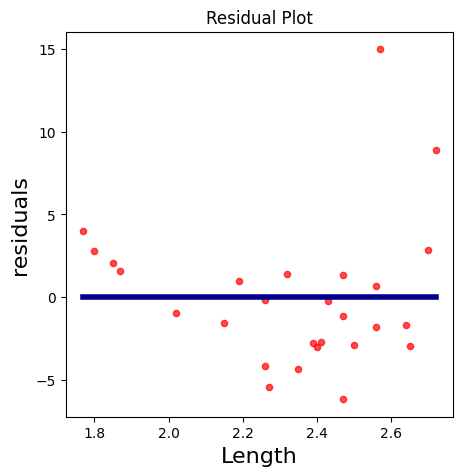

In [19]:
regression_diagnostic_plots(dugong, 'Length', 'Age')

In [35]:
predicted = fit(dugong, 'Length', 'Age')
dugong = dugong.with_column('predicted', predicted)
dugong

Length,Age,predicted
1.8,1,-1.77781
1.85,1.5,-0.589222
1.87,1.5,-0.113788
1.77,1.5,-2.49096
2.02,2.5,3.45196
2.27,4,9.39488
2.15,5,6.54228
2.26,5,9.15717
2.35,7,11.2966
2.47,8,14.1492


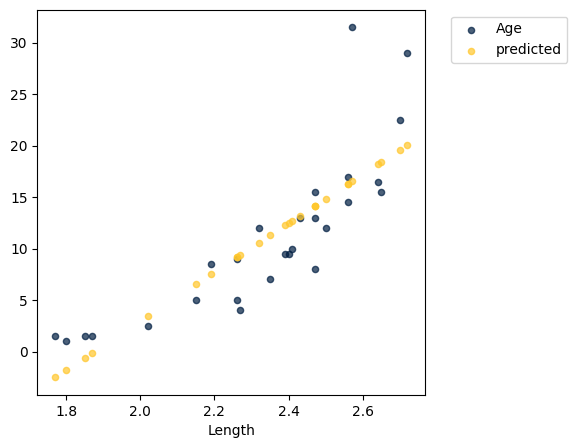

In [36]:
dugong.scatter('Length')

In [43]:
residuals = residual(dugong, 'Length', 'Age')
dugong = dugong.with_column('residuals', residuals)
dugong

Length,Age,predicted,residuals
1.8,1,-1.77781,2.77781
1.85,1.5,-0.589222,2.08922
1.87,1.5,-0.113788,1.61379
1.77,1.5,-2.49096,3.99096
2.02,2.5,3.45196,-0.951963
2.27,4,9.39488,-5.39488
2.15,5,6.54228,-1.54228
2.26,5,9.15717,-4.15717
2.35,7,11.2966,-4.29662
2.47,8,14.1492,-6.14922


In [45]:
correlation(dugong, 'Length', 'residuals')

1.4802973661668753e-16

### 15.5.3. Detecting Heteroscedasticity

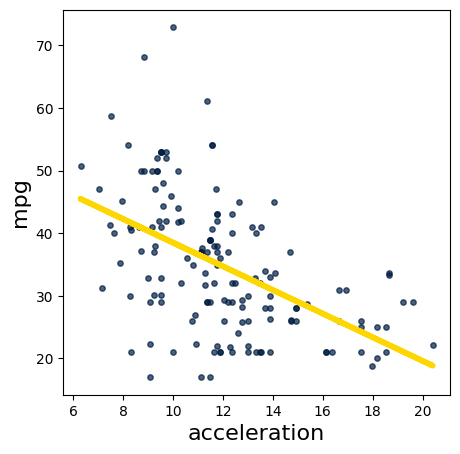

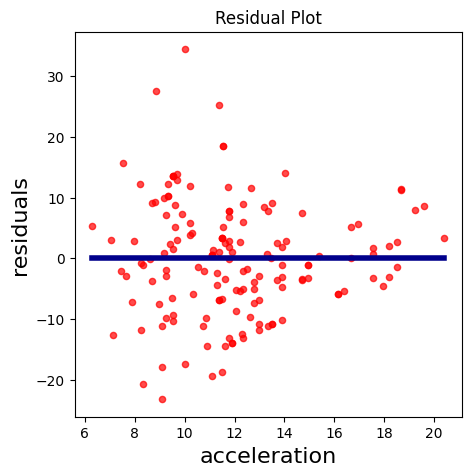

In [20]:
hybrid = Table().read_table('../../data/hybrid.csv')
regression_diagnostic_plots(hybrid, 'acceleration', 'mpg')

In [22]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


In [27]:
residuals = residual(hybrid, 'acceleration', 'mpg')
hybrid = hybrid.with_column('residuals', residuals)
hybrid
correlation(hybrid, 'acceleration', 'residuals')

-4.644070168366668e-17